<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {
      inlineMath: [['$','$'], ['\\(','\\)']],
      displayMath: [['$$','$$'], ['\\[','\\]']]
    },
    TeX: {
      extensions: ["color.js"]
    },
    "HTML-CSS": {
      availableFonts: ["TeX"],
      linebreaks: { automatic: true }
    }
  });
</script>

<script src="https://cdn.jsdelivr.net/npm/mathjax@2/MathJax.js?config=TeX-AMS-MML_HTMLorMML" type="text/javascript"></script>

<style>
@media all {
  body {
    font-weight: 700;
  }
  /* Rende le formule MathJax più spesse */
  .MathJax, .MathJax_Display {
    font-weight: bold; /* Aumenta lo spessore delle formule */
  }
  .bold-text {
    font-weight: bold;
  }
  .heavy-text {
    font-weight: 700;
  }
}
</style>

# <span style="color: red;">FUEL</span>
---
## Metadata

<span style="font-size: 14px;">

- Abstract: Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.
- Source: [UCI Machine Learning Repository](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)
- UCI_id: 19
- Year: 1997
- Number of Instances: 374
- Number of Attributes: 7
- Summary: Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica Volume 1, Number 1, pp. 145-157, 1990. The model evaluates cars according to the following concept structure:


    | Variable Name | Role    | Type       | Description             | Units | Missing Values |
    |---------------|---------|------------|-------------------------|-------|----------------|
    | DATA1         | Feature | Continuous |                         |       | no             |
    | DATA2         | Feature | Integerl   |                         |       | no             |
    | DATA3         | Feature | Continuous |                         |       | no             |
    | DATA4         | Feature | Continuous |                         |       | no             |
    | DATA5         | Feature | Continuous |                         |       | no             |
    | DATA6         | Feature | Integer    |                         |       | no             |
    | DATA7         | Feature | Integer    |                         |       | no             |
    | CLASS         | Target  | Ordinal    | evaluation level        |       | no             |


</span>


---
## Data loading and preprocessing

No missing values in the dataset
Dropped 0 duplicates in the dataset


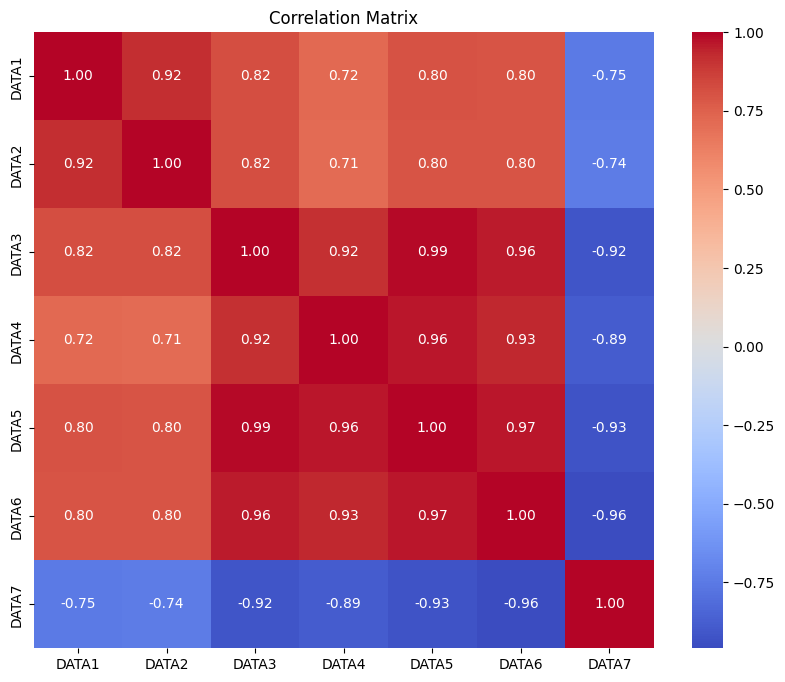

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

path = r"D:/UniBG/38091 Opt/Car Evaluation"
file_path = path + "/Data/Fuel.csv"
full_df = pd.read_csv(file_path)

# Check for missing values
if full_df.isna().sum().sum() > 0:
    clean_df = full_df.dropna()
    print(f"Dropped {full_df.isna().sum().sum()} missing values in the dataset")
else:
    clean_df = full_df
    print("No missing values in the dataset")

# Check for duplicates
if clean_df.duplicated().sum() > 0:
    clean_df = clean_df.drop_duplicates()
    print(f"Dropped {clean_df.duplicated().sum()} duplicates in the dataset")
else:
    print("No duplicates in the dataset")

# Variables and target encoding
X_clean = clean_df.iloc[:, :-1]
Y_clean = clean_df.iloc[:, -1]

class_mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5} #don't remove this line
Y_encoded = Y_clean.map(class_mapping)
X_encoded = X_clean
classes = np.unique(Y_encoded)
C = len(classes)  # Number of classes

if all(isinstance(v, int) for v in class_mapping.values()):
    # Class labels are integers
    class_names = [f"Class {label}" for label in classes]
else:
    # Class labels are strings
    inverse_class_mapping = {v: k for k, v in class_mapping.items()}
    class_names = [inverse_class_mapping[label] for label in classes]
feature_names = X_encoded.columns.tolist()

# Compute the correlation matrix
correlation_matrix = X_encoded.corr()

# Check if the correlation matrix is diagonal
epsilon = 1e-5 # Threshold for the correlation matrix
thresholded_matrix = np.where(np.abs(correlation_matrix) < epsilon, 0, correlation_matrix)
if np.array_equal(thresholded_matrix, np.diag(np.diag(thresholded_matrix))):
    print("Correlation Matrix is diagonal")

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


---

## Import the TPMSVM model

In [2]:
import import_ipynb
import TPMSVM as tpmsvm



---

## Fasten your seatbelts: Model in action!

### Start the engine....

<span style="font-size: 14px;">
We’re about to take off with the latest version of our model. <br>
Hold on tight as we initiate analizing the data and setting the hyperparamenters.

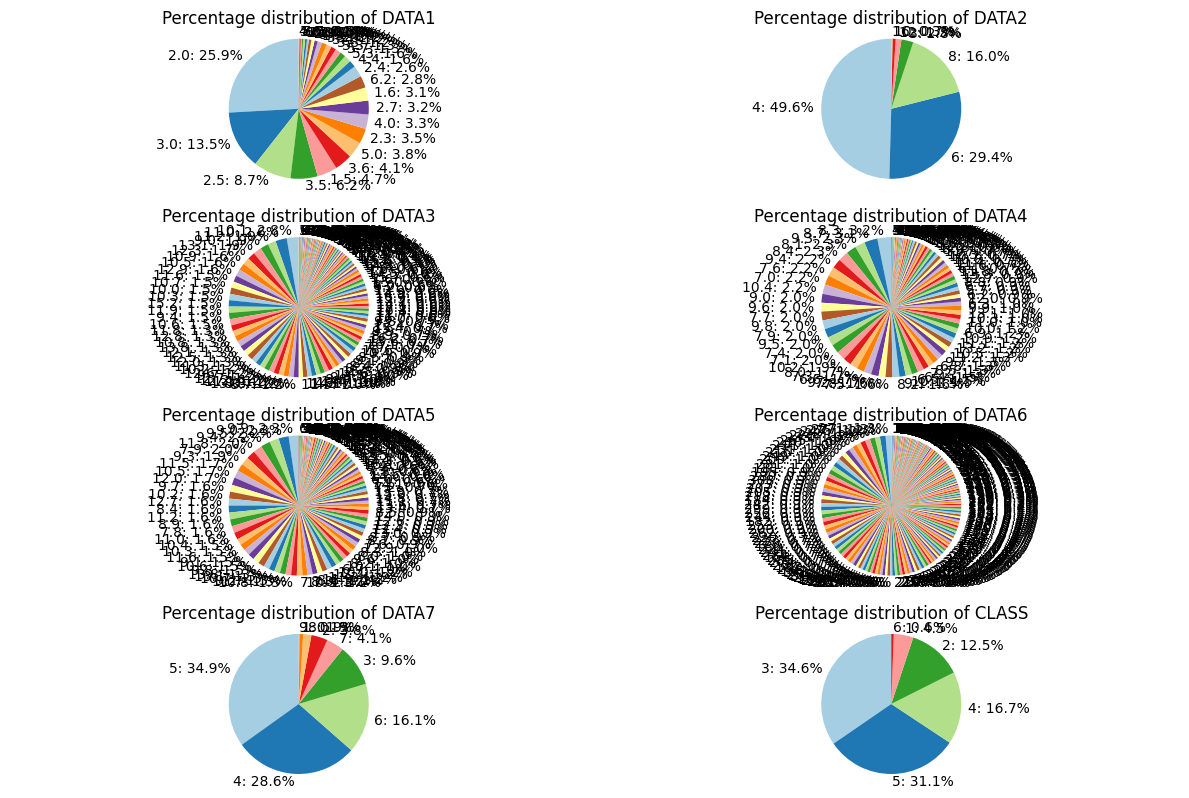

Value of DATA1: min = 1.2, max = 8.0
Value of DATA2: min = 3, max = 16
Value of DATA3: min = 4.4, max = 30.3
Value of DATA4: min = 4.4, max = 20.9
Value of DATA5: min = 4.4, max = 26.1
Value of DATA6: min = 104, max = 608
Value of DATA7: min = 1, max = 9


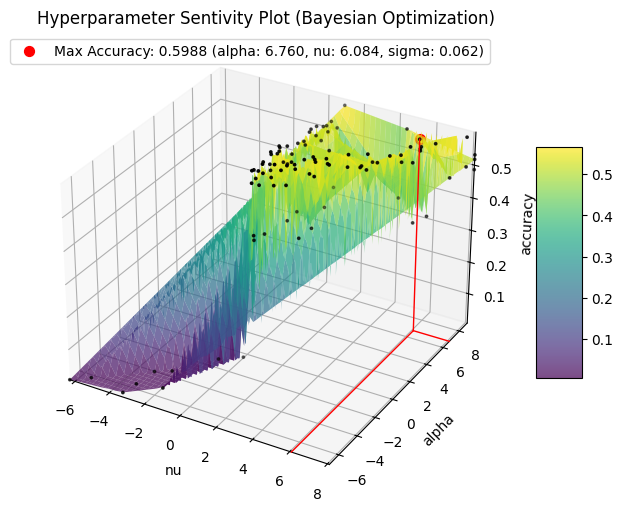

Pivot table of accuracy values and their counts:
    accuracy  count
0   0.598837      1
1   0.587209      1
2   0.583333      1
3   0.581395      1
4   0.579457      2
5   0.579457      3
6   0.577519      1
7   0.577519      1
8   0.575581      3
9   0.573643      1
10  0.571705      1
11  0.571705      2
12  0.569767      3
13  0.569767      2
14  0.565891      2
15  0.565891      1
16  0.563953      1
17  0.563953      2
18  0.562016      2
19  0.560078      2
20   0.55814      3
21  0.556202      1
22  0.556202      4
23  0.556202      1
24  0.554264      1
25  0.554264      1
26  0.552326      1
27   0.54845      1
28  0.546512      1
29  0.544574      2
30  0.542636      2
31  0.540698      1
32  0.540698      1
33  0.536822      2
34  0.536822      1
35  0.534884      1
36  0.532946      1
37  0.531008      4
38   0.52907      1
39  0.527132      2
40  0.527132      1
41  0.525194      2
42  0.525194      1
43  0.521318      1
44   0.51938      1
45  0.517442      2
46  0.51550

In [3]:
# Take a look at the data
tpmsvm.take_a_look(clean_df, X_encoded, Y_encoded)
myfile = f'{path}/Accuracy/Fuel_bayesian2.csv'
tpmsvm.plot_hp_data(myfile,title=' (Bayesian Optimization)')
'''myfile = f'{path}/Accuracy/Fuel_grid.csv'
tpmsvm.plot_hp_data(myfile)'''
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = tpmsvm.data_splitting(X_encoded, Y_encoded, classes)
# Optimize the hyper-parameters
best_alpha, best_nu, best_sigma = tpmsvm.optimize_hyper(
      classes, class_mapping, 
      X_train, Y_train, 
      default_alpha = 6.760,
      default_nu    = 6.084, 
      kernel_type = tpmsvm.rbf_kernel,
      default_sigma = 0.062,
      batch_required = 0.1, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_naive, 
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T=500, 
      file_name="Fuel_new", 
      method='none', 
      verbose=True)


### Go!


Class: 0
- Number of Eigenvalues for H: Positive = 0, Negative = 23, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 23
- gamma function: gamma_naive
- Initial gamma: 0.66068
- Optimization completed in 92 iterations
- Final gradient norm: 1.33392
- Support vectors found: 23
- R^2: 0.08638487712665406
- B  parameter: 4.850755634238632
- L  parameter: 1.5135995039835763
- mu parameter: 0.4864175355386233
- tolerance: 1.110e-14
- T (iterations): 92
- max error: 2.1182072327561027e-17


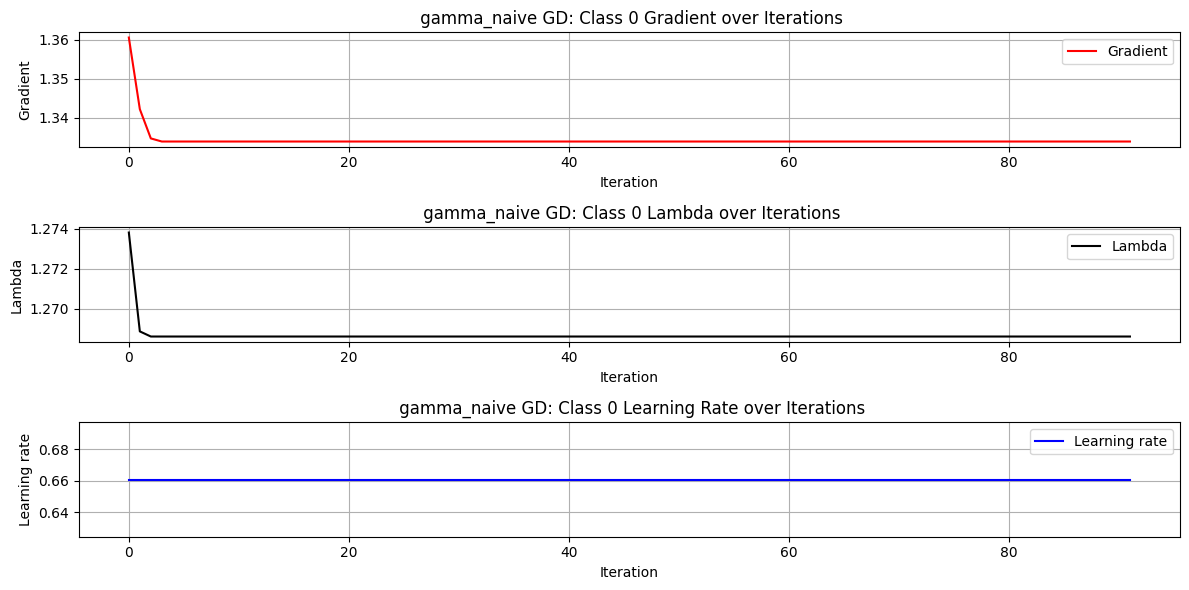


Class: 1
- Number of Eigenvalues for H: Positive = 0, Negative = 65, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 65
- gamma function: gamma_naive
- Initial gamma: 0.50492
- Optimization completed in 2804 iterations
- Final gradient norm: 0.82226
- Support vectors found: 65
- R^2: 0.010816
- B  parameter: 8.312939099494303
- L  parameter: 1.9805275944046856
- mu parameter: 0.01949133648894526
- tolerance: 1.110e-14
- T (iterations): 2804
- max error: 9.679848276822356e-15


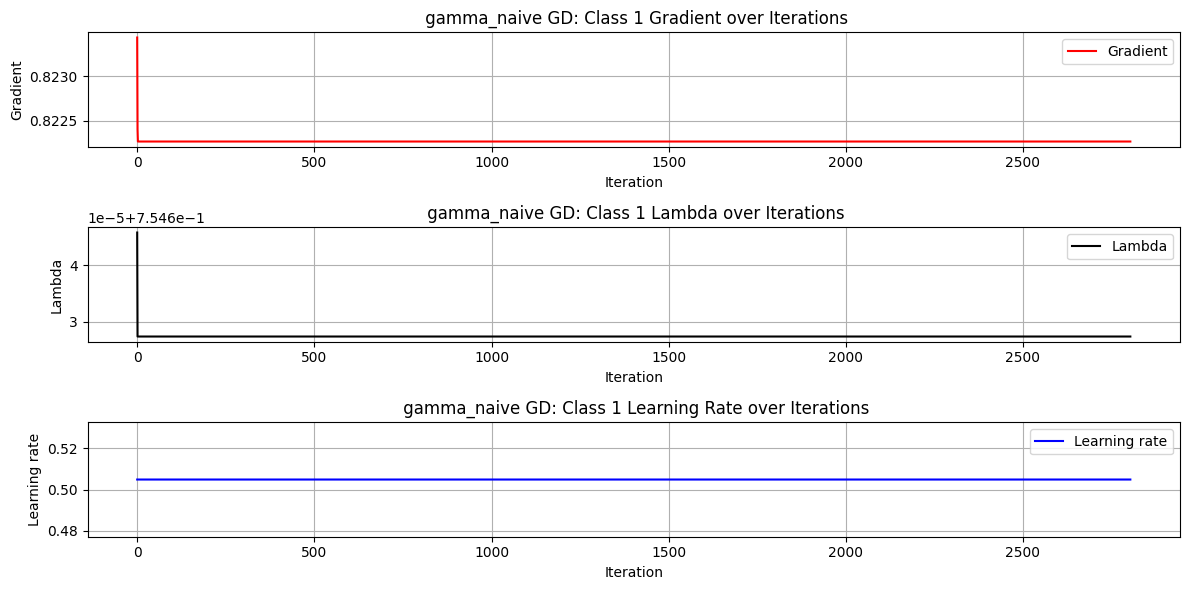


Class: 2
- Number of Eigenvalues for H: Positive = 0, Negative = 179, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 179
- gamma function: gamma_naive
- Initial gamma: 0.37152
- Optimization completed in 1333 iterations
- Final gradient norm: 0.66072
- Support vectors found: 167
- R^2: 0.0014262226522268342
- B  parameter: 14.735212542266204
- L  parameter: 2.691623955995987
- mu parameter: 0.052270291124252584
- tolerance: 1.110e-14
- T (iterations): 1333
- max error: 8.516901290464826e-15


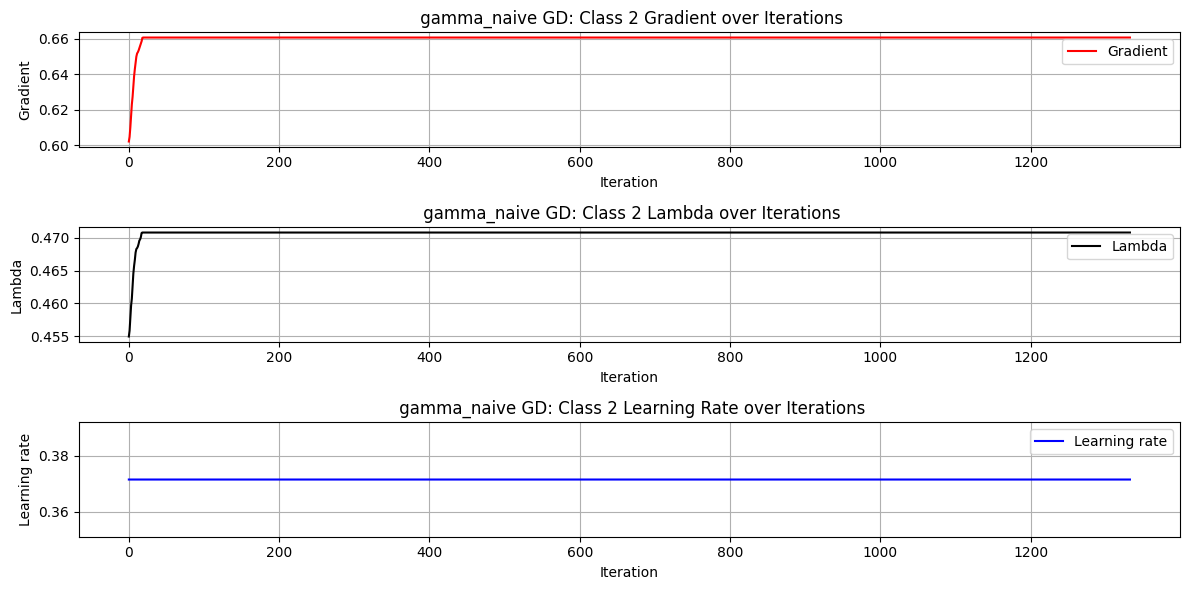


Class: 3
- Number of Eigenvalues for H: Positive = 0, Negative = 86, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 86
- gamma function: gamma_naive
- Initial gamma: 0.51714
- Optimization completed in 728 iterations
- Final gradient norm: 0.77092
- Support vectors found: 86
- R^2: 0.0061786911844240126
- B  parameter: 9.812115866920783
- L  parameter: 1.9337094603245188
- mu parameter: 0.0717864488346291
- tolerance: 1.110e-14
- T (iterations): 728
- max error: 6.540031971361552e-15


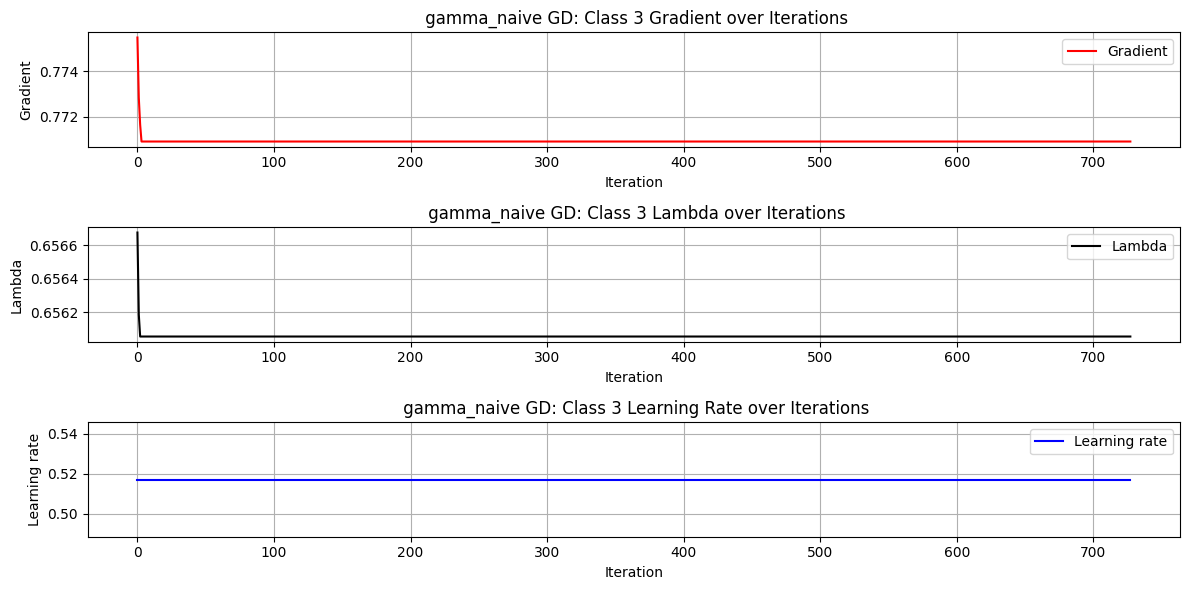


Class: 4
- Number of Eigenvalues for H: Positive = 0, Negative = 160, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 160
- gamma function: gamma_naive
- Initial gamma: 0.25408
- Optimization completed in 3762 iterations
- Final gradient norm: 0.84600
- Support vectors found: 158
- R^2: 0.0017850624999999998
- B  parameter: 15.081723360370036
- L  parameter: 3.9357755761706272
- mu parameter: 0.027706237029183168
- tolerance: 1.110e-14
- T (iterations): 3762
- max error: 1.0083016332878444e-14


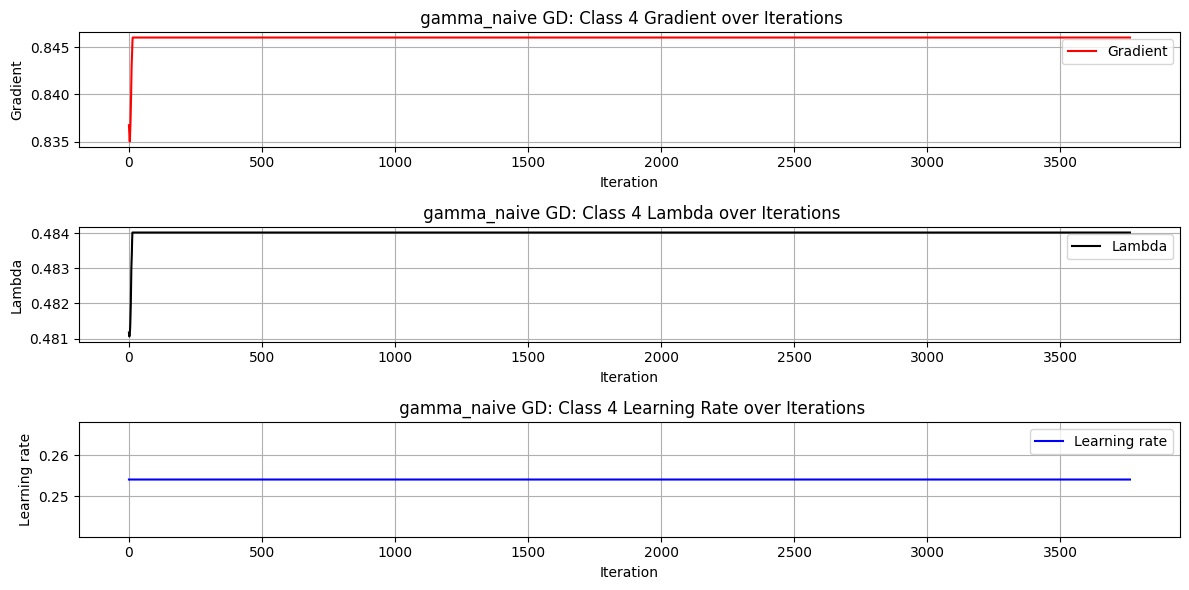


Class: 5
- Number of Eigenvalues for H: Positive = 0, Negative = 3, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Full Gradient Descent
- Batch size: 3
- gamma function: gamma_naive
- Initial gamma: 0.99981
- Optimization completed in 34 iterations
- Final gradient norm: 3.49578
- Support vectors found: 3
- R^2: 5.077511111111112
- B  parameter: 1.7320508289597645
- L  parameter: 1.0001924840349328
- mu parameter: 0.9998075159650671
- tolerance: 1.110e-14
- T (iterations): 34
- max error: 2.0244294780106687e-116


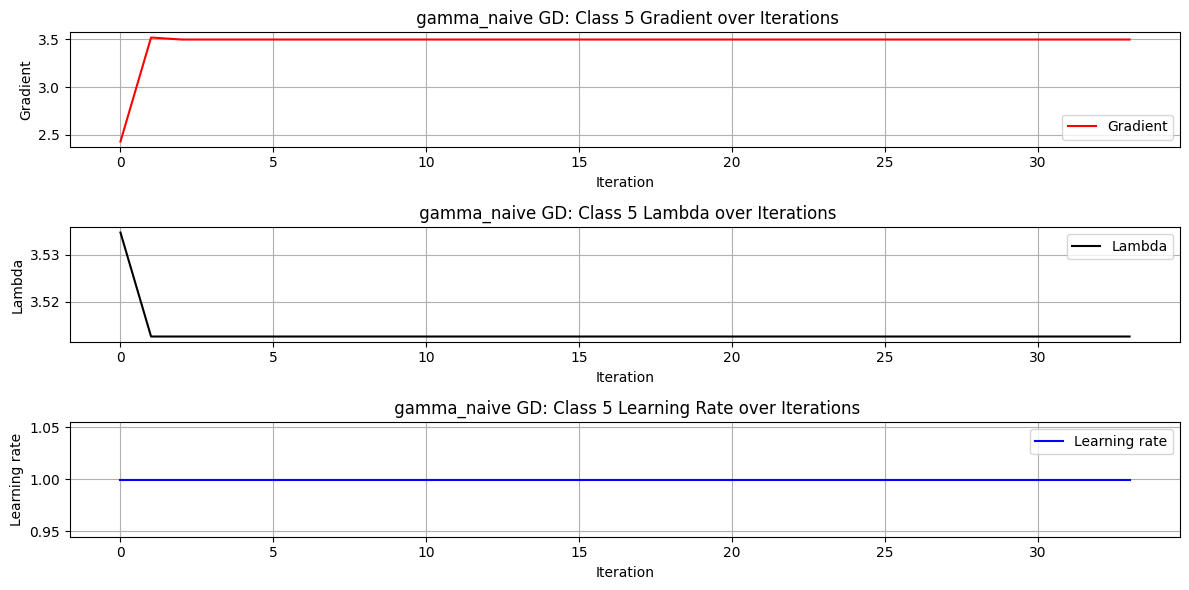


 --- Validation Results ---

Validation accuracy: 0.500 with alpha: 6.760, nu: 6.084 and param: 0.062

              precision    recall  f1-score  support
Class 0        0.500000  0.375000  0.428571      8.0
Class 1        0.090909  0.047619  0.062500     21.0
Class 2        0.483871  0.508475  0.495868     59.0
Class 3        0.500000  0.172414  0.256410     29.0
Class 4        0.566265  0.870370  0.686131     54.0
Class 5        0.000000  0.000000  0.000000      1.0
accuracy       0.500000  0.500000  0.500000      0.5
macro avg      0.356841  0.328980  0.321580    172.0
weighted avg   0.462417  0.500000  0.456304    172.0

 --- Optimization Results with CVXpy ---

Class: 0
- Support vectors found: 22
- Problem status: optimal

Class: 1
- Support vectors found: 55
- Problem status: optimal

Class: 2
- Support vectors found: 51
- Problem status: optimal

Class: 3
- Support vectors found: 37
- Problem status: optimal

Class: 4
- Support vectors found: 37
- Problem status: optimal

Cla

d:\UniBG\38091 OPT\Car Evaluation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\UniBG\38091 OPT\Car Evaluation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\UniBG\38091 OPT\Car Evaluation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

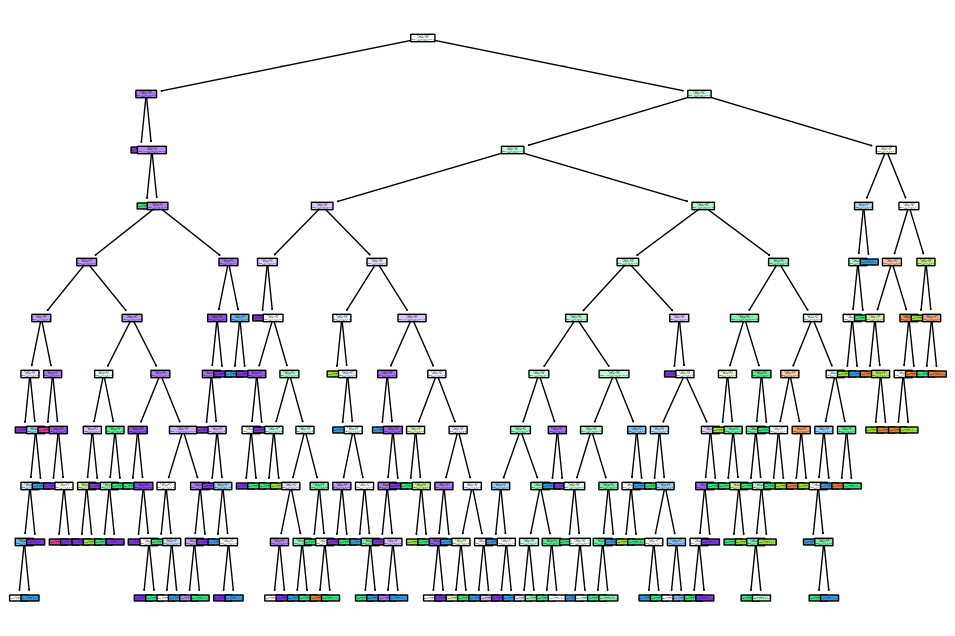


 --- Running Time ---

TPMSVM: 10.83 seconds
CVX: 3.06 seconds
SklearnSVM: 0.03 seconds
SklearnCART: 0.00 seconds


In [4]:
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Run the TPMSVM model
start_time = time.time()
accuracy, models = tpmsvm.TPMSVM(
      classes, class_mapping,
      X_train, Y_train, 
      X_val, Y_val,
      best_alpha, best_nu,
      kernel_type = tpmsvm.rbf_kernel, # Kernel type
      kernel_params = best_sigma, # Kernel parameters
      batch_required = None, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_naive, # Gamma function
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T = 1000,
      verbose=True)
end_TPMSVM = time.time()
# Evaluate the models using CVX.py
tpmsvm.create_model(classes, class_mapping, X_val, Y_val, models)
end_CVX = time.time()
# Evaluate the models using sklearnSVM
tpmsvm.use_sklearnSVM(X_train, Y_train, X_val, Y_val)
end_sklearnSVM = time.time()
# Evaluate the models using sklearnCART
cart_model = tpmsvm.use_sklearnCART(X_train, Y_train, X_val, Y_val)
end_sklearnCART = time.time()
plt.figure(figsize=(12,8))
plot_tree(cart_model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

# Print the time taken for each method
print(f"\n --- Running Time ---\n")
print(f"TPMSVM: {end_TPMSVM - start_time:.2f} seconds")
print(f"CVX: {end_CVX - end_TPMSVM:.2f} seconds")
print(f"SklearnSVM: {end_sklearnSVM - end_CVX:.2f} seconds")
print(f"SklearnCART: {end_sklearnCART - end_sklearnSVM:.2f} seconds")

---
<span style="font-size: 12px;">

- Accuracy: The proportion of correct predictions relative to the total predictions.<br>
- Precision: The proportion of true positives relative to the total predicted positives. It indicates how reliable the positive predictions are.<br>
- Recall: The proportion of true positives relative to the total actual positives. It indicates how well the model finds the positives.<br>
- F1 Score: The harmonic mean of precision and recall. It is useful when there is an imbalance between classes.<br>